# Color Plots - Matplot Code Cheat Sheet
# |
## Colors in the default property cycle:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

lwbase = plt.rcParams['lines.linewidth']
thin = float('%.1f' % (lwbase / 2))
thick = lwbase * 3

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
for icol in range(2):
    if icol == 0:
        lwx, lwy = thin, lwbase
    else:
        lwx, lwy = lwbase, thick
    for irow in range(2):
        for i, color in enumerate(colors):
            axs[irow, icol].axhline(i, color=color, lw=lwx)
            axs[irow, icol].axvline(i, color=color, lw=lwy)

    axs[1, icol].set_facecolor('k')
    axs[1, icol].xaxis.set_ticks(np.arange(0, 10, 2))
    axs[0, icol].set_title('line widths (pts): %.1f, %.1f' % (lwx, lwy),
                           fontsize='medium')

for irow in range(2):
    axs[irow, 0].yaxis.set_ticks(np.arange(0, 10, 2))

fig.suptitle('Colors in the default prop_cycle', fontsize='large')

plt.show()

# |
## Visualizing Named Colors:
(simple plot example with named colors and its visual representation)

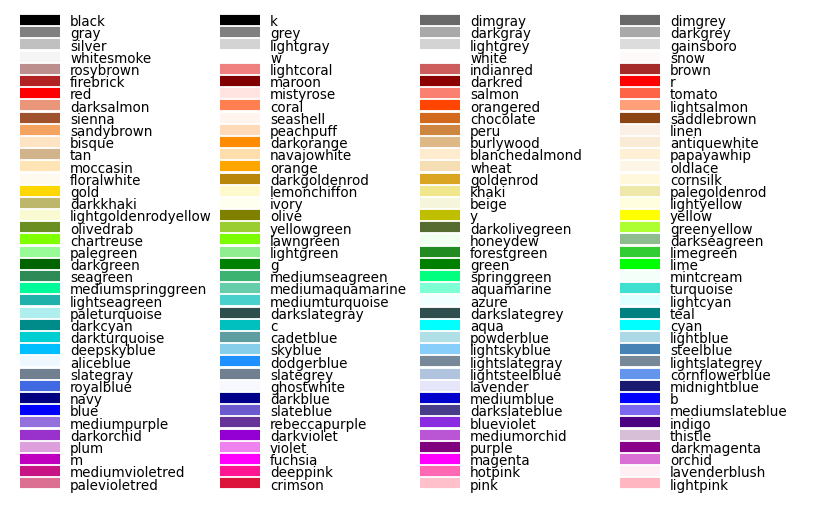

In [1]:
from __future__ import division


import matplotlib.pyplot as plt

from matplotlib import colors as mcolors



colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


# Sort colors by hue, saturation, value and name.

by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                
                for name, color in colors.items())

sorted_names = [name for hsv, name in by_hsv]


n = len(sorted_names)

ncols = 4

nrows = n // ncols + 1


fig, ax = plt.subplots(figsize=(8, 5))


# Get height and width

X, Y = fig.get_dpi() * fig.get_size_inches()

h = Y / (nrows + 1)

w = X / ncols


for i, name in enumerate(sorted_names):

    col = i % ncols

    row = i // ncols

    y = Y - (row * h) - h


    xi_line = w * (col + 0.05)

    xf_line = w * (col + 0.25)

    xi_text = w * (col + 0.3)


    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            
            horizontalalignment='left',

            verticalalignment='center')


    ax.hlines(y + h * 0.1, xi_line, xf_line,
              
              color=colors[name], linewidth=(h * 0.6))
    

ax.set_xlim(0, X)

ax.set_ylim(0, Y)

ax.set_axis_off()


fig.subplots_adjust(left=0, right=1,
                    
                    top=1, bottom=0,

                    hspace=0, wspace=0)


plt.show()

# |
## Colormaps
# 



This example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

> **Sequential:**
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

> **Diverging:**
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

> **Qualitative:**
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

> **Miscellaneous:**
    Colormaps that don't fit into the categories above.


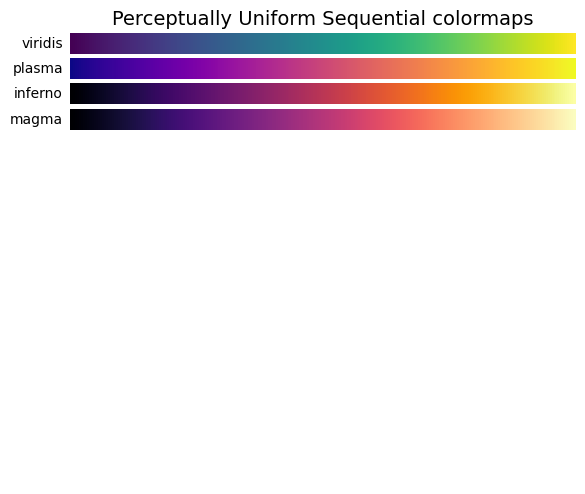

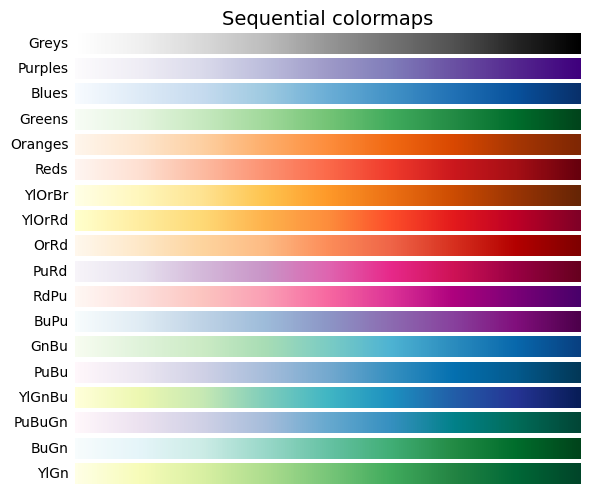

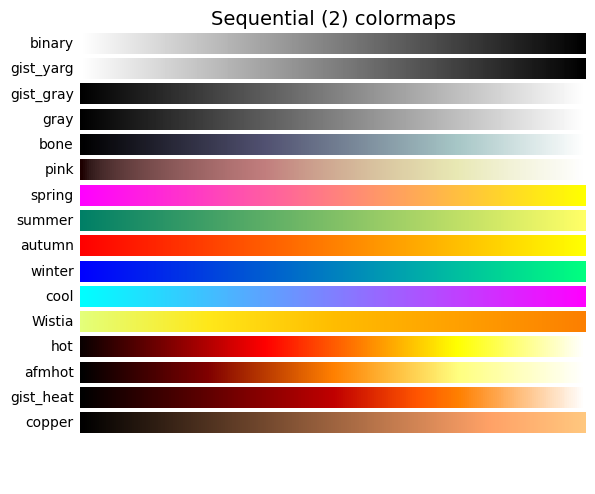

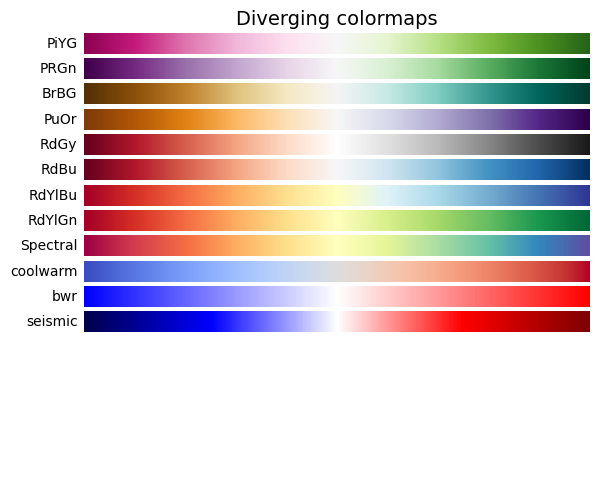

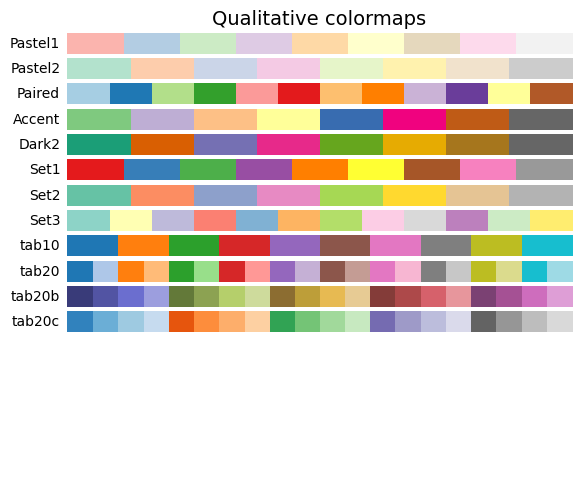

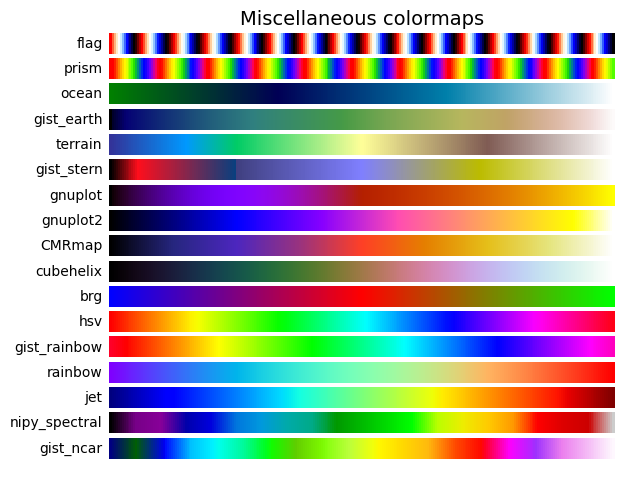

In [2]:
import numpy as np

import matplotlib.pyplot as plt



# Have colormaps separated into categories:

# http://matplotlib.org/examples/color/colormaps_reference.html

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]



nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)

gradient = np.linspace(0, 1, 256)

gradient = np.vstack((gradient, gradient))



def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)


plt.show()

## Colorbar Tick Labelling

Produce custom labelling for a colorbar.

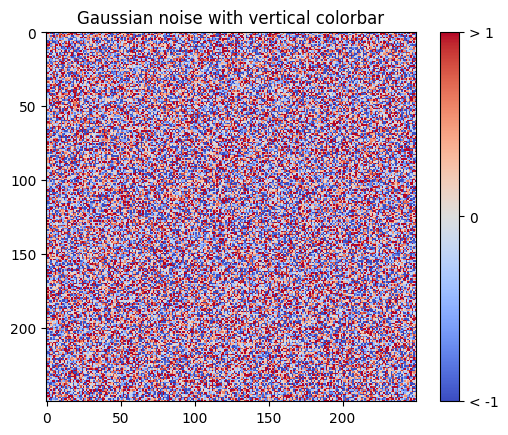

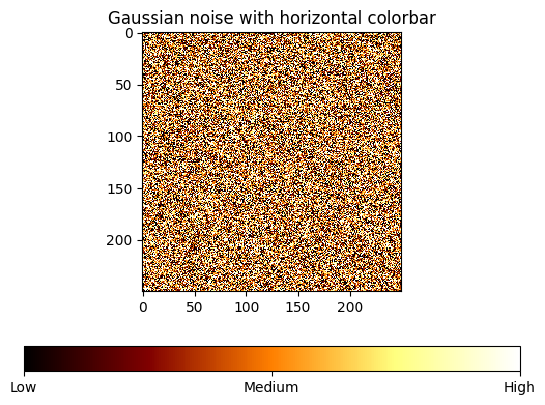

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

# Make plot with horizontal colorbar
fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.afmhot)
ax.set_title('Gaussian noise with horizontal colorbar')

cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

plt.show()

# |
## Color Cycler
# 
Custom property-cycle settings to control colors and other style
properties for multi-line plots.

This example demonstrates two different APIs:

    1. Setting the default rc parameter specifying the property cycle.
       This affects all subsequent axes (but not axes already created).
    2. Setting the property cycle for a single pair of axes.

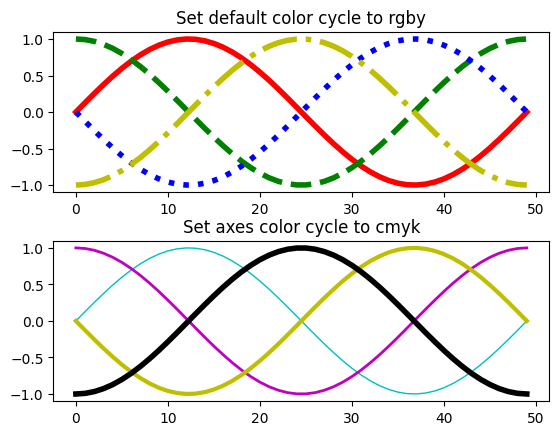

In [3]:
from cycler import cycler

import numpy as np

import matplotlib.pyplot as plt



x = np.linspace(0, 2 * np.pi)

offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)

# Create array with shifted-sine curve along each column

yy = np.transpose([np.sin(x + phi) for phi in offsets])


# 1. Setting prop cycle on default rc parameter

plt.rc('lines', linewidth=4)

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           
                           cycler('linestyle', ['-', '--', ':', '-.'])))

fig, (ax0, ax1) = plt.subplots(nrows=2)

ax0.plot(yy)

ax0.set_title('Set default color cycle to rgby')


# 2. Define prop cycle for single set of axes

ax1.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
                   
                   cycler('lw', [1, 2, 3, 4]))

ax1.plot(yy)

ax1.set_title('Set axes color cycle to cmyk')


# Tweak spacing between subplots to prevent labels from overlapping

fig.subplots_adjust(hspace=0.3)


plt.show()